# Assignment 12 - Natural Language Processing

##### 1. Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.

- Stem or lemmatize the words and find counts.
- Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.

In [8]:
!pip3 install nltk
import nltk
nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/connorlove/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/connorlove/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/connorlove/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/connorlove/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

pl_words = nltk.corpus.gutenberg.words('milton-paradise.txt')
sw = set(stopwords.words('english'))
other_stopwords = {'thou', 'thy', 'thee', 'thus', 'yet', 'though', 'may',
                   'shall', 'like', 'till', 'hath', 'whose', 'us'} # Needed to exclude "us" because,
sw.update(other_stopwords)                                         # for some reason, the Lemmatizer
                                                                   # was shortening "us" to "u", so
filtered_pl = [word.lower() for word in pl_words                   # the only way I could eliminate it
               if word.lower() not in sw                           # was by stopword-ing the root.
               and word.isalnum()]                                 # Incidentally, by my discretion, I
                                                                   # don't believe "first", "one" or 
                                                                   # far are stop-word worthy, and haven't included them.
lemmatizer = WordNetLemmatizer()                                   
paradise_lost_lemmatized = [lemmatizer.lemmatize(word) for word in filtered_pl]

pl_word_freq = FreqDist(paradise_lost_lemmatized)

top_words = [word for word, _ in pl_word_freq.most_common(20)]
word_freqs = [freq for _, freq in pl_word_freq.most_common(20)]

print("Top 20 Words:")
for word, freq in zip(top_words, word_freqs):
    print(f'{word}: {freq}')

Top 20 Words:
heaven: 436
god: 316
earth: 217
man: 176
first: 175
day: 157
high: 153
one: 142
son: 132
far: 129
death: 127
power: 125
great: 123
world: 119
hell: 119
thing: 116
light: 116
angel: 111
stood: 110
night: 109


- Select the top 20 words and create a bar chart.

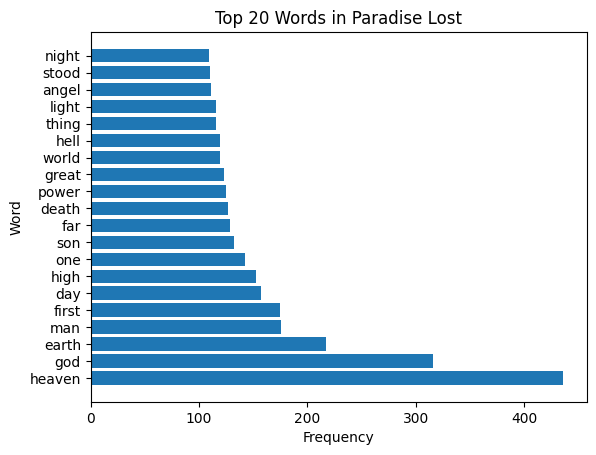

In [10]:
import matplotlib.pyplot as plt

plt.barh(top_words, word_freqs)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Words in Paradise Lost')
plt.show()

- Specify why you chose stemming or lemmatization.

I chose lemmatization since it's a more complex process—and is thusly, more accurate—than stemming. Although stemming will suffice for more simple requests, lemmatization, critically, considers the CONTEXT of a word where stemming does not, before returning its lemma.

#### 2. Perform Vader Sentiment Analysis on the book.

- Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/connorlove/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pl_sents = nltk.corpus.gutenberg.sents('milton-paradise.txt')
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for sentence in pl_sents:
    sentence_text = ' '.join(sentence)
    sentiment = analyzer.polarity_scores(sentence_text)
    compound = sentiment['compound']
    pos = sentiment['pos']
    neg = sentiment['neg']
    neu = sentiment['neu']
    
    sentiments.append({
        "text": sentence_text.strip(),
        "compound": compound,
        "positive": pos,
        "negative": neg,
        "neutral": neu
        })

sorted_sentiments = sorted(sentiments, key = lambda x: x['compound'])

negatives = sorted_sentiments[:5]
positives = sorted_sentiments[-5:]

# Finding the most neutral are a big tougher than integering the most negative and positive,
# but I've settled on centering the neutrals around the middle of the average sentiment scores,
# two behind the center, and three above:
middle = len(sorted_sentiments) // 2
neutrals = sorted_sentiments[middle - 2 : middle + 3]

for sentiment in negatives:
    print("Sentence:", sentiment['text'])
    print("Sentiment Score:", sentiment['compound'])

Sentence: that now , While time was , our first parents had been warned The coming of their secret foe , and ' scaped , Haply so ' scaped his mortal snare : For now Satan , now first inflamed with rage , came down , The tempter ere the accuser of mankind , To wreak on innocent frail Man his loss Of that first battle , and his flight to Hell : Yet , not rejoicing in his speed , though bold Far off and fearless , nor with cause to boast , Begins his dire attempt ; which nigh the birth Now rolling boils in his tumultuous breast , And like a devilish engine back recoils Upon himself ; horrour and doubt distract His troubled thoughts , and from the bottom stir The Hell within him ; for within him Hell He brings , and round about him , nor from Hell One step , no more than from himself , can fly By change of place : Now conscience wakes despair , That slumbered ; wakes the bitter memory Of what he was , what is , and what must be Worse ; of worse deeds worse sufferings must ensue .
Sentiment

In [13]:
for sentiment in positives:
    print("Sentence:", sentiment['text'])
    print("Sentiment Score:", sentiment['compound'])

Sentence: Mine eyes he closed , but open left the cell Of fancy , my internal sight ; by which , Abstract as in a trance , methought I saw , Though sleeping , where I lay , and saw the shape Still glorious before whom awake I stood : Who stooping opened my left side , and took From thence a rib , with cordial spirits warm , And life - blood streaming fresh ; wide was the wound , But suddenly with flesh filled up and healed : The rib he formed and fashioned with his hands ; Under his forming hands a creature grew , Man - like , but different sex ; so lovely fair , That what seemed fair in all the world , seemed now Mean , or in her summed up , in her contained And in her looks ; which from that time infused Sweetness into my heart , unfelt before , And into all things from her air inspired The spirit of love and amorous delight .
Sentiment Score: 0.9954
Sentence: This having learned , thou hast attained the sum Of wisdom ; hope no higher , though all the stars Thou knewest by name , and

In [14]:
for sentiment in neutrals:
    print("Sentence:", sentiment['text'])
    print("Sentiment Score:", sentiment['compound'])

Sentence: who am alone From all eternity ; for none I know Second to me or like , equal much less .
Sentiment Score: 0.128
Sentence: To him she hasted ; in her face excuse Came prologue , and apology too prompt ; Which , with bland words at will , she thus addressed .
Sentiment Score: 0.128
Sentence: My voice thou oft hast heard , and hast not feared , But still rejoiced ; how is it now become So dreadful to thee ?
Sentiment Score: 0.1342
Sentence: for whose well being So amply , and with hands so liberal , Thou hast provided all things : But with me I see not who partakes .
Sentiment Score: 0.1406
Sentence: Whereat the heart of Adam , erst so sad , Greatly rejoiced ; and thus his joy broke forth .
Sentiment Score: 0.1445


#### 3. Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

The sentences are... SOMEWHAT accurate to their sentiment scores. Beginning with the negatives, I'd almost entirely agree with the upper -0.9 analyses, given the sentences are riddled with speak of Satan, betrayal, frost, perversion, and monstrosity. Moving onto the positive sentiments, things get a bit weirder, but still mostly hold together. For one, the first sentence details the creation of eve from Adam's rib, though this is counterweighted by the speak of amorous "delight" and creation, later, placing it as the least positive of the five. This notion of imaginative description lifting the top five sentences into their placement strengthens as we move further up the chain, with recurrences of "light" and "warmth", again, pretty rightfully, dotting every sentece. The top five neutral statements are the most self-contradictory to their supposed group, of the three sentiment groupings. The first sentence seems abjectly bleak, speaking of "alone" for all "eternity", the second an apology of "bland words" (which somehow bears a score of 0.128), the third a message of becoming "So dreadful to thee", and the final two speak of "well being", "Amply", "provided", "rejoiced", and "joy", yet bear scores only .01 more positive than the former.

I believe the discrepenancy between the accuracy of sentiment analyses can be explained by the model's lack of complex MEANING processing. While VaderSentiment does feature some very useful context processes in its determination of sentiment, these are limited when it comes to the abstract, final landing point of sentences; by this, I mean that if a sentence began mournful, but transformed into something joyuous, it would be categorized as "neutral", despite the fact we would hang onto and derive meaning from the net idea—happiness—of the message.